In [1]:
import torch

train_img = torch.load("cached_data/val_img")
train_cap = torch.load("cached_data/val_cap")
train_mask = torch.load("cached_data/val_mask")
print("Loaded train data", train_img.size(), train_cap.size(), train_mask.size())

Loaded train data torch.Size([5000, 3, 224, 224]) torch.Size([5000, 43]) torch.Size([5000, 43])


In [2]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[CLS] two men check a white surfboard on a bench. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


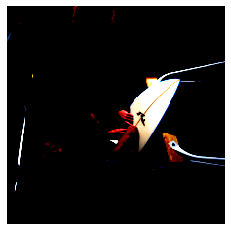

In [6]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, train_img.size(0)-1)

plt.axis("off")
plt.imshow(train_img[idx].permute(2,1,0))

print(tokenizer.decode(train_cap[idx].numpy()))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


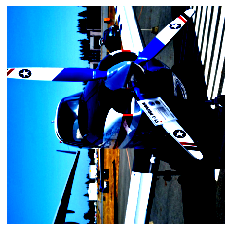

In [17]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets

def new_get(self, index):
    """
    Also returns the path of the image
    :param self:
    :param index:
    :return:
    """
    path, _ = self.samples[index]
    sample = self.loader(path)
    if self.transform is not None:
        sample = self.transform(sample)
    return sample, path
traindir = "dataset/train" 
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
datasets.ImageFolder.__getitem__ = new_get
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=1, shuffle=False,
    num_workers=2)

for step, batch in enumerate(train_loader):
    image = batch[0][0]
    if step == 30:
        break
plt.axis("off")
plt.imshow(image.permute(2,1,0))

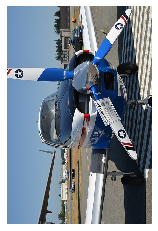

In [18]:
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.ToTensor(),
    ])),
    batch_size=1, shuffle=False,
    num_workers=2)

for step, batch in enumerate(train_loader):
    image = batch[0][0]
    if step == 30:
        break
plt.axis("off")
plt.imshow(image.permute(2,1,0))